In [9]:
import pandas as pd
# import cufflinks as cf
from lifelines import KaplanMeierFitter

cf.go_offline()
data = pd.read_csv('churn.csv')

ModuleNotFoundError: No module named 'lifelines'

In [18]:
import pandas as pd

occupancy = pd.read_csv('occupancy.csv')
occupancy.date = pd.to_datetime(occupancy.date)
occupancy.index = pd.DatetimeIndex(occupancy.date, freq='H')

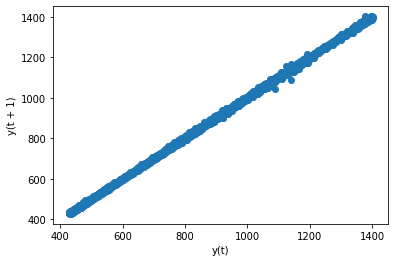

In [19]:
from pandas.plotting import lag_plot

lag_plot(occupancy['CO2'])

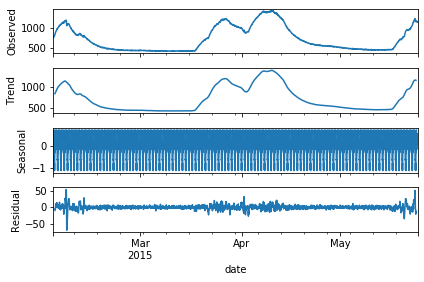

In [20]:
import statsmodels.api as sm

res = sm.tsa.seasonal_decompose(occupancy['CO2'])
resplot = res.plot()

In [21]:
from statsmodels.tsa.ar_model import AR

train, test = occupancy['CO2'][:-10], occupancy['CO2'][-10:]
model = AR(occupancy['CO2'])
model_fit = model.fit(maxlag = 1)
predictions = model_fit.predict(start = len(train), end = len(train) + len(test) - 1, dynamic = False)

In [22]:
print(model_fit.params)
pd.DataFrame({'observed': test, 'predicted': predictions})

const     0.001078
L1.CO2    1.000195
dtype: float64


,observed,predicted
date,,
2015-05-24 04:00:00,1153.250000,1152.725379
2015-05-24 05:00:00,1152.400000,1153.475525
2015-05-24 06:00:00,1146.166667,1152.625359
2015-05-24 07:00:00,1145.400000,1146.390813
2015-05-24 08:00:00,1140.800000,1145.623997
2015-05-24 09:00:00,1150.250000,1141.023102
2015-05-24 10:00:00,1129.200000,1150.474941
2015-05-24 11:00:00,1125.800000,1129.420844
2015-05-24 12:00:00,1123.000000,1126.020182


In [23]:
from statsmodels.tsa.stattools import adfuller

adfuller(occupancy['CO2'])[1] # p-value

0.06822624483241077

In [24]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(occupancy['CO2'], order = (0, 1))
model_fit = model.fit(disp = False)

predictions = model_fit.predict(len(occupancy['CO2']) - 3, len(occupancy['CO2']) - 1)

pd.DataFrame({'observed': occupancy['CO2'][-3:], 'predicted': predictions})

,observed,predicted
date,,
2015-05-24 11:00:00,1125.8,926.767714
2015-05-24 12:00:00,1123.0,915.383885
2015-05-24 13:00:00,1124.0,923.902279


In [25]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(occupancy['CO2'], order = (2, 1))
model_fit = model.fit(disp = False)

predictions = model_fit.predict(len(occupancy['CO2']) - 3, len(occupancy['CO2']) - 1)

pd.DataFrame({'observed': occupancy['CO2'][-3:], 'predicted': predictions})

C:\Users\rbarr\Miniconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


,observed,predicted
date,,
2015-05-24 11:00:00,1125.8,1128.130874
2015-05-24 12:00:00,1123.0,1124.572188
2015-05-24 13:00:00,1124.0,1121.659629
